In [ ]:
import numpy as np
import concurrent.futures as cf
import matplotlib.pyplot as plt
from sklearn.decomposition import dict_learning_online
%matplotlib inline
import nibabel as nib
%run nifti_tools.ipynb

In [ ]:
# Loading the standardized matrix
X_std = np.memmap('/data/bioprotean/SVD/vg/matx_vg_scaled.mymemmap', dtype='float32', \
mode='r', shape=(159326,2941))

# Defining the number of components to do DLSC
# range(start, stop, step)
n = list(range(650, 1001, 50))

for i in n:
    # Creating a DLSC instance and computing it
    dict_learner = dict_learning_online(X_std, n_components=i, return_code=True, n_jobs=-1, \
random_state=42)
    
    # Saving to file
    np.save('/data/bioprotean/ABA/DLSC/code/code_'+str(i)+'.npy', dict_learner[0])
    np.save('/data/bioprotean/ABA/DLSC/dictionary/dictionary_'+str(i)+'.npy', dict_learner[1])

In [16]:
# Loading the components file
code = np.load('/data/bioprotean/ABA/DLSC/dict_learning_online/code_200.npy')

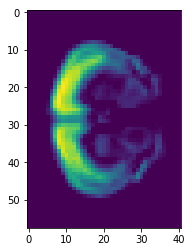

In [31]:
# Visualizing slices of the DLSC

# Choosing the component number and slice number to see
component_n = 20
slice_n = 20
volume = code[:, component_n].reshape(67,58,41)
slice = volume[slice_n,:,:]
plt.imshow(slice)